# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [67]:
#%pip install --upgrade plotly

## Import Statements

In [68]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [69]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [70]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [71]:
#29322 rows 3 columns
#df_hh_income.shape
#df_hh_income.columns
#'Geographic Area', 'City', 'Median Income'
df_hh_income.isna().sum()
#51 na values in the median income column

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [72]:
#29329 ROWS 3 columns
df_pct_completed_hs.shape
df_pct_completed_hs.columns
#'Geographic Area', 'City', 'percent_completed_hs'
df_pct_completed_hs.isna().sum()
#no na values

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [73]:
#df_fatalities
#2535 rows 14 columns
df_fatalities.shape
df_fatalities.columns
#'id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
#       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
#       'flee', 'body_camera'
df_fatalities.isna().sum()
#77 age,9 ared,195 race 65 flee

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [74]:
df_pct_poverty
#29329 rows 3 columns
#df_pct_poverty.shape
df_pct_poverty.columns
#'Geographic Area', 'City', 'poverty_rate'
df_pct_poverty.isna().sum()
#no na values

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [75]:
df_share_race_city
#df_share_race_city.shape
#29268 rows 7 columns
df_share_race_city.columns
#'Geographic area', 'City', 'share_white', 'share_black',
#       'share_native_american', 'share_asian', 'share_hispanic'
df_share_race_city.isna().sum()
#no na values

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [76]:
#Fatalities and hh income have missing values,lets substitute them with 0
#df.fillna(0) to fill with zeroes
df_fatalities = df_fatalities.fillna(0)
df_fatalities.isna().sum()
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [77]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'],errors='coerce')
poverty_per_state = df_pct_poverty.groupby('Geographic Area',as_index=False).agg({'poverty_rate':pd.Series.mean}).sort_values(by='poverty_rate',ascending=False)
poverty_per_state['poverty_rate']

25   26.88
3    25.67
10   23.78
32   23.08
2    22.96
18   22.34
40   22.16
49   21.13
36   20.66
1    20.65
24   20.11
17   20.08
43   19.92
42   19.89
0    19.85
27   19.75
13   18.24
7    18.00
22   17.90
9    17.57
4    17.12
21   16.89
37   16.52
26   16.51
41   16.03
15   15.50
47   15.02
35   14.85
16   14.76
45   14.59
14   13.88
46   13.79
23   13.75
11   13.40
5    13.36
29   12.98
48   12.86
30   12.66
8    12.56
38   12.52
33   12.47
12   12.29
28   12.16
44   11.98
34   11.67
39   10.37
20   10.31
50    9.89
19    9.59
6     9.14
31    8.19
Name: poverty_rate, dtype: float64

In [78]:
bar= px.bar(poverty_per_state, 
             x=poverty_per_state['Geographic Area'], 
             y=poverty_per_state['poverty_rate'],  
             title='Number of Launches per Organization',
             color="poverty_rate",
             color_continuous_scale='Electric'
             )
bar.update_layout(coloraxis_showscale=False, xaxis_title = "State", yaxis_title='Poverty Rate')
bar.update_layout(yaxis=dict(tickfont=dict(size=10)))
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [82]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs['percent_completed_hs'] != '-']
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
graduation_per_state = df_pct_completed_hs.groupby('Geographic Area',as_index=False).agg({'percent_completed_hs':pd.Series.mean}).sort_values(by='percent_completed_hs',ascending=True)
graduation_per_state

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95
1,AL,80.30
3,AZ,80.47
40,SC,80.85
32,NM,80.98
42,TN,81.63


In [83]:
bar= px.bar(graduation_per_state, 
             x=graduation_per_state['Geographic Area'], 
             y=graduation_per_state['percent_completed_hs'],  
             title='High school graduation rate',
             color="percent_completed_hs",
             color_continuous_scale='Electric'
             )
bar.update_layout(coloraxis_showscale=False, xaxis_title = "State", yaxis_title='Graduation Rate')
bar.update_layout(yaxis=dict(tickfont=dict(size=10)))
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [84]:
#They both have the same "Geographic Area column "
#poverty_per_state graduation_per_state
poverty_highschool = poverty_per_state.merge(graduation_per_state, on='Geographic Area')
poverty_highschool


,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.67,80.47
2,GA,23.78,79.01
3,NM,23.08,80.98
4,AR,22.96,79.95
5,LA,22.34,79.29
6,SC,22.16,80.85
7,WV,21.13,82.35
8,OK,20.66,82.91
9,AL,20.65,80.30


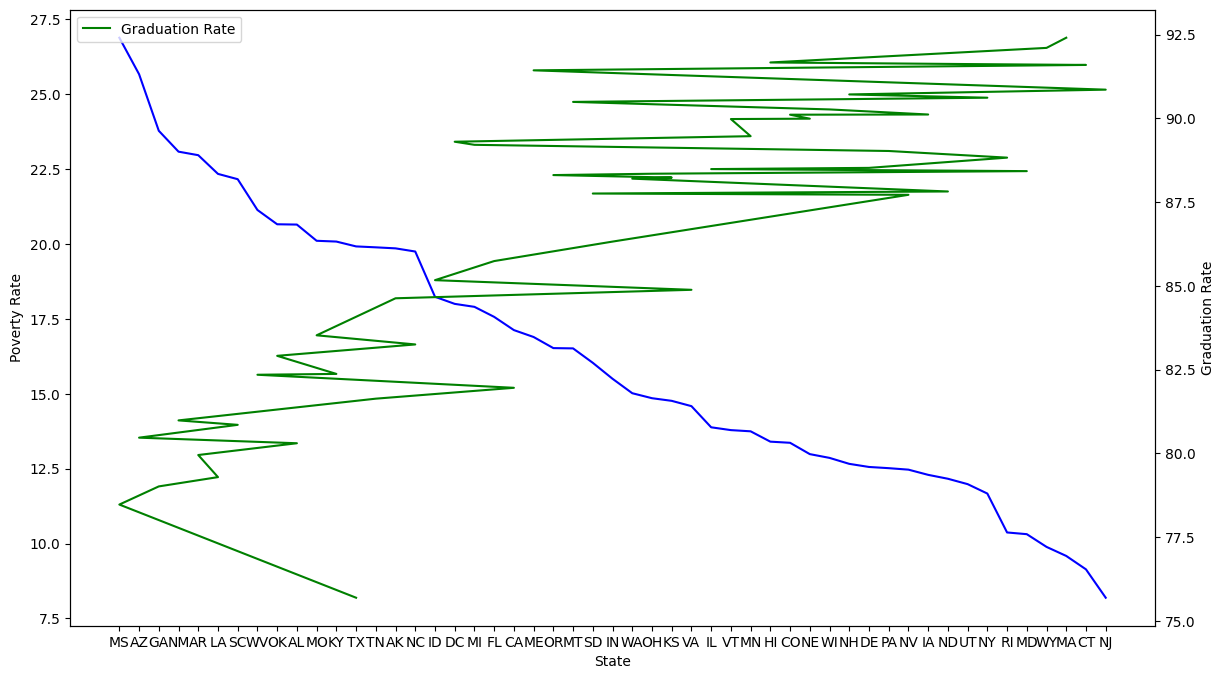

In [87]:
# create a figure with 2 y-axes
fig, ax1 = plt.subplots(figsize=(14,8))
ax2 = ax1.twinx()

# plot the poverty rate on the first y-axis
ax1.plot(poverty_per_state['Geographic Area'], poverty_per_state['poverty_rate'], color='blue', label='Poverty Rate')
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate')

# plot the graduation rate on the second y-axis
ax2.plot(graduation_per_state['Geographic Area'], graduation_per_state['percent_completed_hs'], color='green', label='Graduation Rate')
ax2.set_ylabel('Graduation Rate')

plt.xticks(rotation=90)
# add a legend
plt.legend()

# show the chart
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

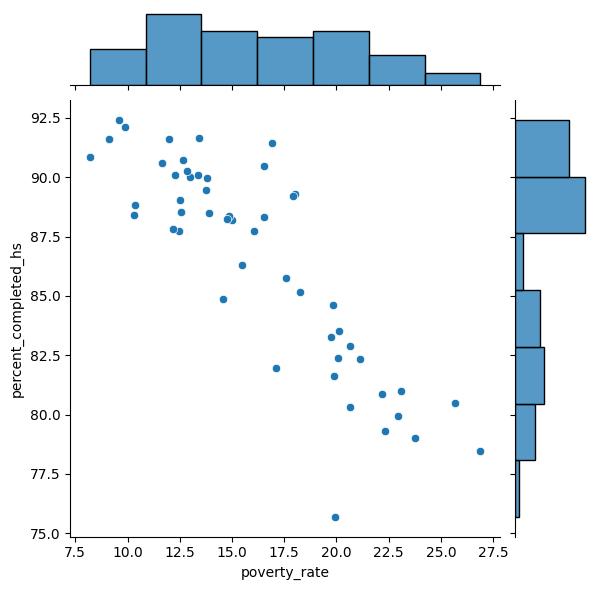

In [90]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool, kind='scatter')
plt.show()

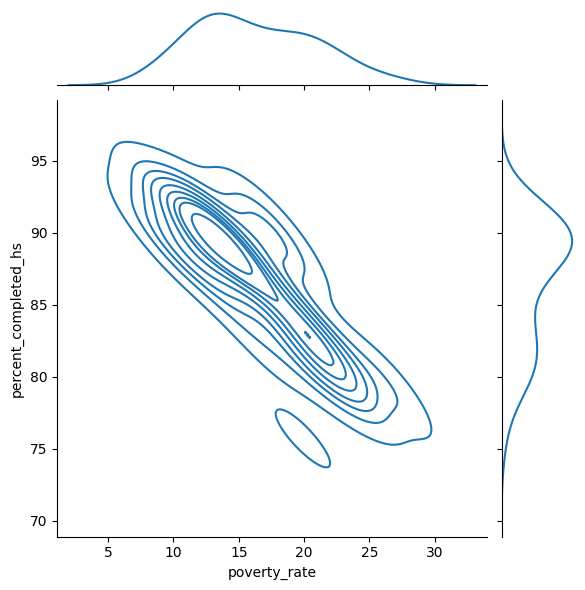

In [91]:
sns.jointplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

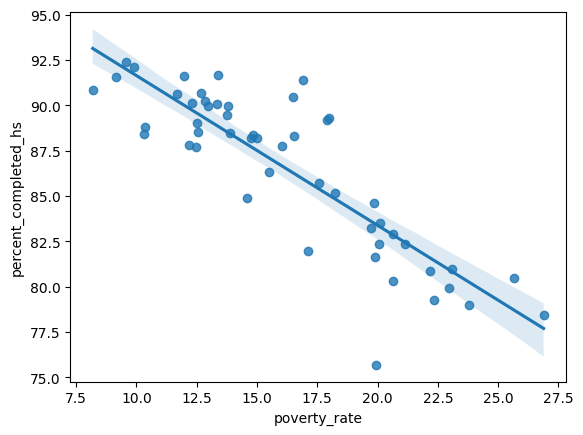

In [92]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool)
plt.show()

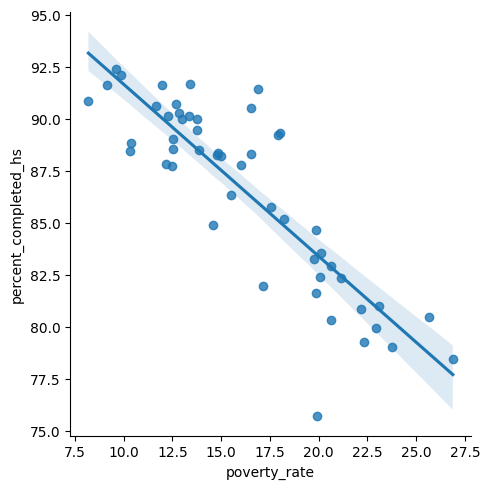

In [93]:
sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=poverty_highschool)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [95]:
#Again i will group all data by state and .agg the races with pd.series.mean
#share_white,share_black,share_native_american,share_asian,share_hispanic
#df_share_race_city.groupby('Geographic Area',as_index=False).agg({'percent_completed_hs':pd.Series.mean})
df_share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']] = df_share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']].apply(pd.to_numeric, errors='coerce')
race_states = df_share_race_city.groupby('Geographic area', as_index=False).agg({'share_white':pd.Series.mean,'share_black':pd.Series.mean,'share_native_american':pd.Series.mean,'share_asian':pd.Series.mean,'share_hispanic':pd.Series.mean})
race_states


,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [100]:
race_states[['share_white','share_black','share_native_american','share_asian','share_hispanic']] = race_states[['share_white','share_black','share_native_american','share_asian','share_hispanic']].div(race_states[['share_white','share_black','share_native_american','share_asian','share_hispanic']].sum(axis=1), axis=0).multiply(100)

fig = px.bar(race_states, x='Geographic area', y=['share_white','share_black','share_native_american','share_asian','share_hispanic'],
             labels={'Geographic area':'State','share_white':'Share White','share_black':'Share Black','share_native_american':'Share Native American','share_asian':'Share Asian','share_hispanic':'Share Hispanic'},
             title='Share of Different Races per State',
             color_discrete_sequence=px.colors.sequential.Plasma)
fig.update_layout(yaxis_title="Share of Population",
                  barmode='stack')

fig.update_layout(width=1100)
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [104]:
#df_fatalities.groupby('race').agg({'name':pd.Series.count})
df_fatalities_agg = df_fatalities.groupby('race').agg({'name':pd.Series.count}).rename(columns={'name':'count'})
df_fatalities_agg

,count
race,
0,195
A,39
B,618
H,423
N,31
O,28
W,1201


In [106]:
import plotly.express as px

fig = px.pie(df_fatalities_agg, values='count', names=df_fatalities_agg.index,title='Deaths in Police Brutality by Race')
fig.show()

#'W' represents 'White'
#'B' represents 'Black'
#'H' represents 'Hispanic'
#'A' represents 'Asian'
#'N' represents 'Native American'
#'O' represents 'Other'

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
#continue here

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).